In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaikhabdulwahid","key":"1b1019a1b5227ee439eef682403c1238"}'}

In [4]:
import os
import zipfile

# Making hidden directory for Kaggle API
os.makedirs("/root/.kaggle", exist_ok=True)

# Moving kaggle.json to the correct folder
!mv kaggle.json /root/.kaggle/

# Seting proper permissions
!chmod 600 /root/.kaggle/kaggle.json


In [5]:
# Fake and real news dataset from Kaggle
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Unziping the downloaded dataset
with zipfile.ZipFile("fake-and-real-news-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("fake_news_data")

# Listing the files
os.listdir("fake_news_data")


['Fake.csv', 'True.csv']

In [7]:
# taking the datasets into dataframe
fake_df = pd.read_csv("fake_news_data/Fake.csv")
real_df = pd.read_csv("fake_news_data/True.csv")

In [8]:
fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
fake_df['label'] = 0
real_df['label'] = 1

In [11]:
# concating both datasets to a single dataframe
df = pd.concat([fake_df, real_df], ignore_index=True)

In [12]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [14]:
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


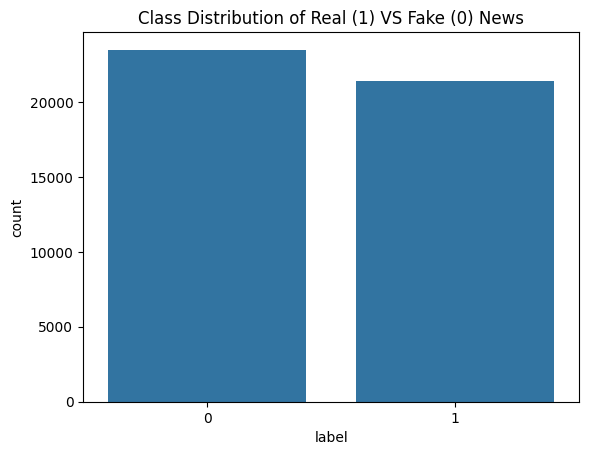

label
0    52.298543
1    47.701457
Name: proportion, dtype: float64


In [15]:
# checking class distribution
sns.countplot(x='label', data=df)
plt.title('Class Distribution of Real (1) VS Fake (0) News')
plt.show()

# percentage distribution
print(df['label'].value_counts(normalize=True) * 100)

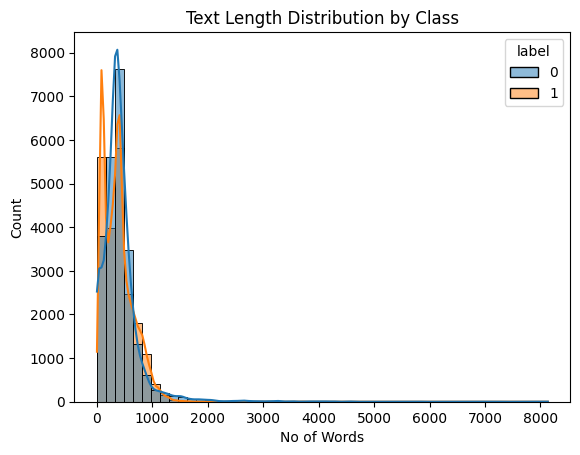

In [16]:
# text length analysis
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

sns.histplot(data=df,x='text_length', hue='label', bins=50, kde=True)
plt.xlabel('No of Words')
plt.ylabel('Count')
plt.title('Text Length Distribution by Class')
plt.show()

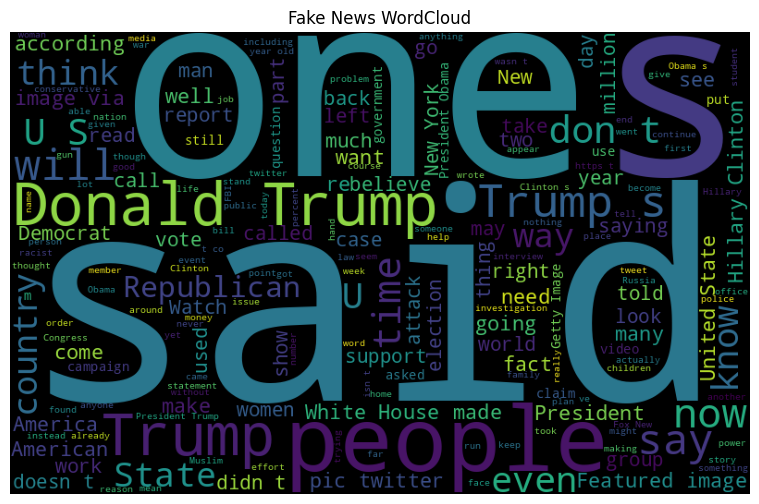

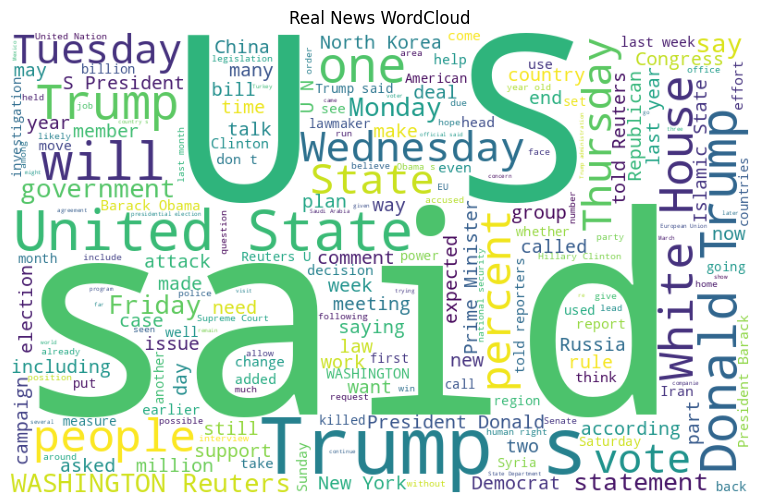

In [17]:
# most common words
from wordcloud import WordCloud

fake_text = " ".join(df[df['label'] == 0]['text'].astype(str))
real_text = " ".join(df[df['label'] == 1]['text'].astype(str))

# Fake News WordCloud
plt.figure(figsize=(10,6))
plt.title("Fake News WordCloud")
plt.imshow(WordCloud(width=800, height=500, background_color='black').generate(fake_text))
plt.axis('off')
plt.show()

# Real News WordCloud
plt.figure(figsize=(10,6))
plt.title("Real News WordCloud")
plt.imshow(WordCloud(width=800, height=500, background_color='white').generate(real_text))
plt.axis('off')
plt.show()


In [18]:
df.head()

,title,text,subject,date,label,text_length
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0,171
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1,771
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1,304
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0,183
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1,529


In [19]:
df['subject'].value_counts(normalize=True)

,proportion
subject,
politicsNews,0.251058
worldnews,0.225957
News,0.201568
politics,0.152368
left-news,0.099314
Government News,0.034968
US_News,0.017440
Middle-east,0.017328


In [20]:
fake_df['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [21]:
real_df['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [22]:
df = df.drop(columns=['subject'])

In [23]:
df.sample(7)

,title,text,date,label,text_length
34406,President Trump? Masked Nationalists Beat Up ...,A group of thugs marched through the main trai...,"January 30, 2016",0,310
38135,US Senate passes bill to fund government throu...,WASHINGTON (Reuters) - The U.S. Senate passed ...,"December 10, 2016",1,84
34734,Melania Trump hails 'empowerment of women' at ...,RIYADH (Reuters) - U.S. First Lady Melania Tru...,"May 21, 2017",1,254
32877,Fire in Philippine shopping mall kills 37,MANILA (Reuters) - Fire swept through a shoppi...,"December 24, 2017",1,160
23890,North Korea Promises To “Mercilessly Wipe Out...,North Korea is now vowing to mercilessly wipe...,"May 12, 2017",0,321
8581,Here’s The Most Scathing Indictment Yet Of Th...,There are too many people in our society who f...,"June 15, 2016",0,822
15297,"U.S. wants stronger India economic, defense ti...",WASHINGTON (Reuters) - U.S. Secretary of State...,"October 18, 2017",1,692


In [25]:
# Using both title and text combined
df['combined_text'] = df['title'] + " " + df['text']


In [26]:
# train test split
from sklearn.model_selection import train_test_split

X = df['combined_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



In [27]:
# text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vc = TfidfVectorizer(stop_words='english', max_df=0.7)

X_train_vc = vc.fit_transform(X_train)
X_test_vc = vc.transform(X_test)

In [28]:
# Model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train_vc, y_train)
y_pred = nb.predict(X_test_vc)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4696
           1       0.94      0.93      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

[[4450  246]
 [ 300 3984]]


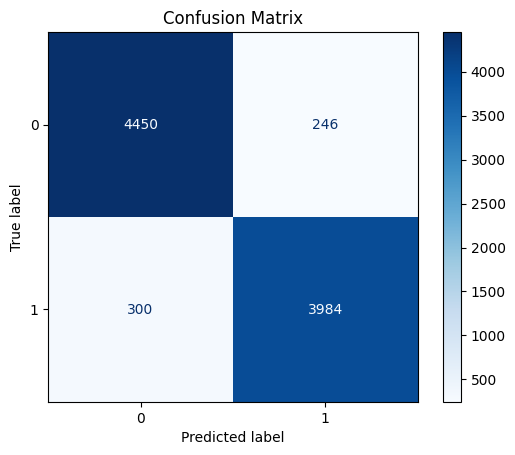

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-30-4198833265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Correct", "Incorrect"], y=[correct, incorrect], palette='coolwarm')


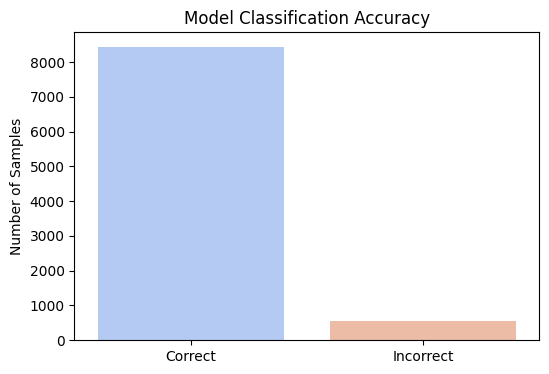

In [30]:
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

plt.figure(figsize=(6,4))
sns.barplot(x=["Correct", "Incorrect"], y=[correct, incorrect], palette='coolwarm')
plt.ylabel("Number of Samples")
plt.title("Model Classification Accuracy")
plt.show()


## 📌 **Conclusion**

In this project, we developed a Fake News Detection model using Natural Language Processing and Machine Learning techniques. We combined datasets of real and fake news articles, cleaned and preprocessed the data, and applied TF-IDF vectorization to extract meaningful features from the text.

After training a classifier (e.g., Logistic Regression or Random Forest), our model achieved impressive results with an accuracy of approximately **94%**, and balanced precision, recall, and F1-scores. This suggests our model can effectively differentiate between fake and real news articles.

While there is room for further improvement via advanced models like XGBoost or neural networks, this version provides a solid baseline. The project demonstrates a practical application of machine learning in combating misinformation, an increasingly relevant challenge in today's digital world.

🚀 Future improvements may include:
- Using deep learning models like LSTM or BERT
- Handling multilingual fake news
- Integrating the model into a web app for public use
